## 1. Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("NationalNames.csv")
print(len(df))

1825433


### 2. Вывести первые 8 записей

In [7]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### 3. Вивести останні 8 рядків набору даних.

In [8]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### 4. Отримайте імена стовпців набору даних

In [9]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

### 5. Отримайте загальну інформацію про дані у наборі даних.

In [10]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 6. Знайдіть кількість унікальних імен у наборі даних

In [11]:
df["Name"].nunique()

93889

### 7. Обчисліть кількість унікальних жіночих та чоловічих імен у наборі даних

In [12]:
df.groupby("Gender")["Name"].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

### 8. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [13]:
df[(df["Year"] == 2010) & (df["Gender"] == 'M')].sort_values('Count', ascending = False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### 9. Знайдіть найпопулярніше ім’я за результатами одного року

In [14]:
PopularNameInYear = df[df.Count == df.Count.max()][["Name", "Year"]]
print("The name is '{}' in {}".format(str(PopularNameInYear['Name'].values[0]), int(PopularNameInYear['Year'])))

The name is 'Linda' in 1947


### 10. Підрахуйте кількість записів, для яких Count - мінімальне у наборі

In [15]:
df.where(df['Count'] == df['Count'].min()).count().iloc()[0]

254615

### 11. Підрахуйте кількість унікальних імен у кожному році

In [16]:
df.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


### 12. Знайдіть рік із найбільшою кількістю унікальних імен

In [17]:
df.groupby('Year').nunique().sort_values('Name', ascending=False).head(1)

,Id,Name,Year,Gender,Count
Year,,,,,
2008,35045,32488,1,2,1377


### 13. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)

In [18]:
df[(df.Year == 2008)].sort_values('Count', ascending=False).head().iloc()[0]

Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object

### 14. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен

In [19]:
df[(df.Name == 'Jacob') & (df.Gender == 'F')].sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


### 15. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена)

In [20]:
df3 = df.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count().unstack()
max = df3.max()
print("{} рік має найбільшу кількість гендерно нейтральних імен = {} ".format(str(df3.index[df3 == max][0][2]),str(df3.values[df3 == max][0])))

2008 рік має найбільшу кількість гендерно нейтральних імен = 2557 


### 16. Знайдіть загальну кількість народжень за рік.

In [21]:
df.groupby('Year').sum()['Count']

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

### 17. Знайдіть рік, коли народилося найбільше дітей

In [2]:
df.groupby('Year').agg({'Count':sum}).sort_values(by=['Count'], ascending=False).head(1).index[0]

1957

### 18. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [3]:
countBoyandGirls = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
countBoyandGirls

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


### 19. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків

In [25]:
countBoyandGirls[countBoyandGirls.F > countBoyandGirls.M].count().F

54

### 20. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

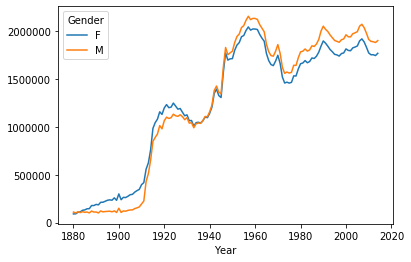

In [28]:
df = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
df.plot()
plt.show()

### 21. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)

In [4]:
df.groupby(['Name', 'Gender']).sum().unstack().dropna().count()['Count']

Gender
F    10221
M    10221
dtype: int64

### 22. Порахуйте, скільки разів хлопчиків називали Barbara

In [5]:
df[(df.Name=='Barbara') & (df.Gender=='M')].Count.sum()

4139